In [ ]:
# Install libs
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [34]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 22.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [35]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjusts the configuration of the plots we'll create.

In [ ]:
df = pd.read_csv('movies.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
a = df['name']
a

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df['budget']

In [ ]:
new_query = df[['name', 'year']]

In [ ]:
display(new_query.head(20))

In [ ]:
director = df[['name', 'year','director']]

In [ ]:
display(director)

In [ ]:
# Checking for missing data.
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

In [ ]:
df.dtypes

In [ ]:
df.fillna(0)

In [ ]:
df['budget'] = df['budget'].astype('int64')

In [ ]:
# Change data type for columns.
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [ ]:
df.head(5)

In [ ]:
ds = df.isin([np.inf, -np.inf])
print(ds)

In [ ]:
# Removing infinite values from dataframe
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Correcting year column
df['correct_year'] = df['released'].astype(int).str[8:13]
df

In [ ]:
df.rename(columns={'year':'decade_released'})

In [30]:
df = df.sort_values(by='gross', inplace=False, ascending=False)

In [ ]:
df

In [ ]:
# Set max rows to None in order to get all rows.
pd.set_option('display.max_rows', None)

In [ ]:
# Sift for duplicate
df['company'].drop_duplicates().sort_values(ascending=False).head(50)

# If you wish to drop all duplicate values 
# df.drop_duplicates()

In [ ]:
# Budget likely has a high correlation
# Company likely has a high correlation

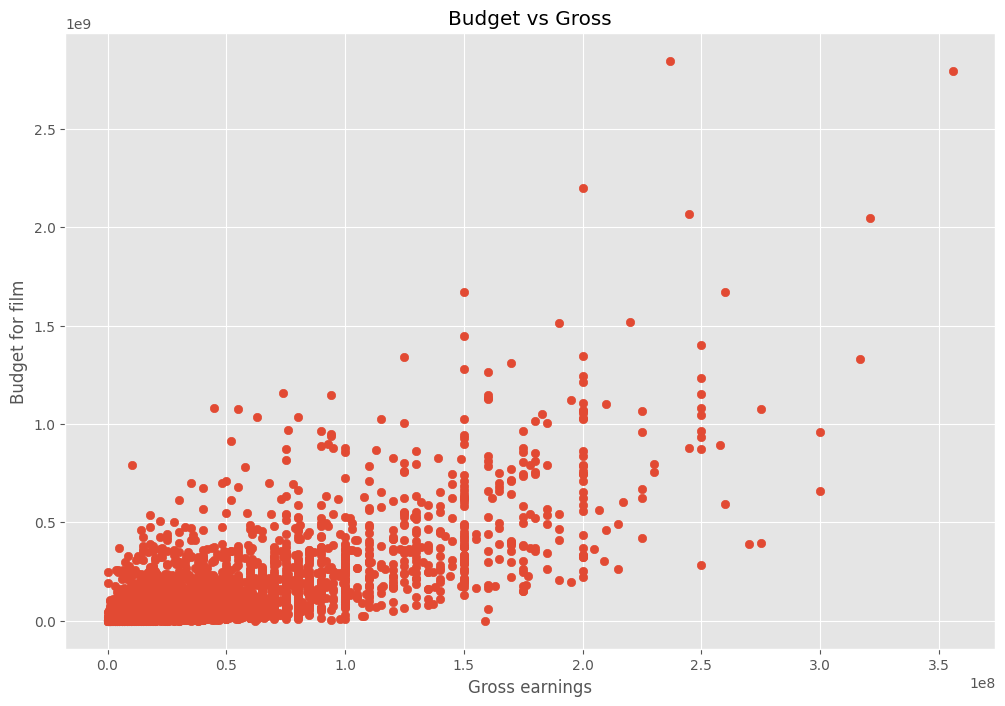

In [23]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross")
plt.xlabel("Gross earnings")
plt.ylabel("Budget for film")
plt.show()

In [ ]:
df[['budget', 'gross']].head()

In [ ]:
company_df = df.loc[df['company'] == 'Lucasfilm']
company_df.sort_values(by='gross', ascending=False, inplace=False)

plt.scatter(x=company_df['budget'], y=company_df['gross'])
plt.title("Budget vs Gross")
plt.xlabel("Gross earnings")
plt.ylabel("Budget for film")
plt.show()

company_df.sort_values(by='gross', ascending=False, inplace=False)

<AxesSubplot: xlabel='budget', ylabel='gross'>

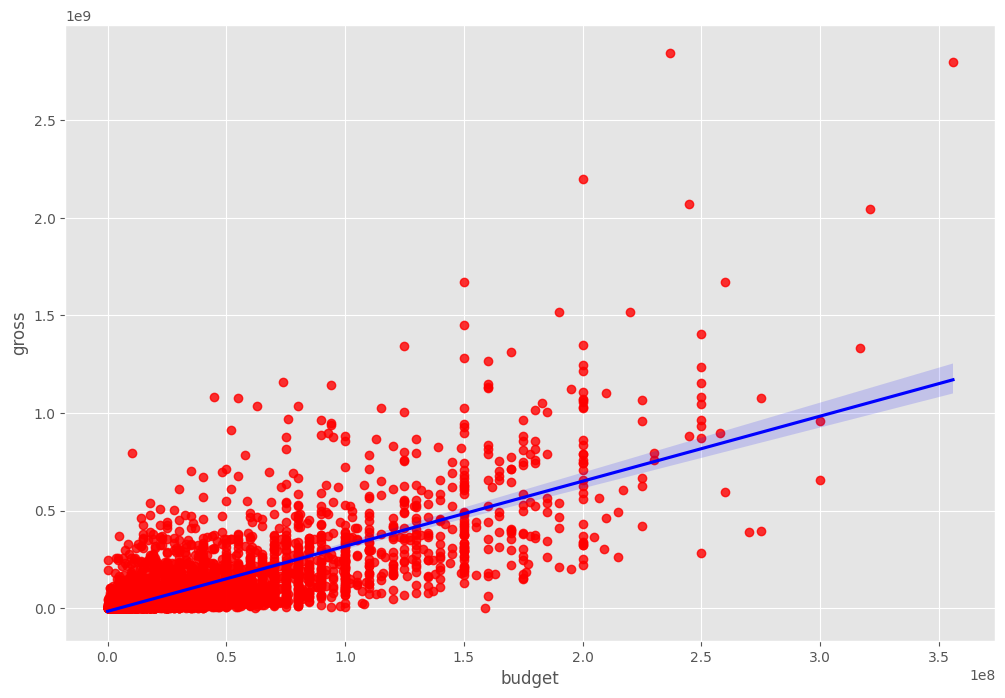

In [28]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":'blue'})

In [ ]:
# Let's start looking at correlation

In [33]:
df.corr(method="pearson") #Pearson, Kendall, Spearman

/tmp/ipykernel_4651/897339472.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson") #Pearson, Kendall, Spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [38]:
df.corr(method="spearman") #Pearson, Kendall, Spearman

/tmp/ipykernel_4651/1524062869.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman") #Pearson, Kendall, Spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


/tmp/ipykernel_4651/2104482525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method="pearson") #Pearson, Kendall, Spearman


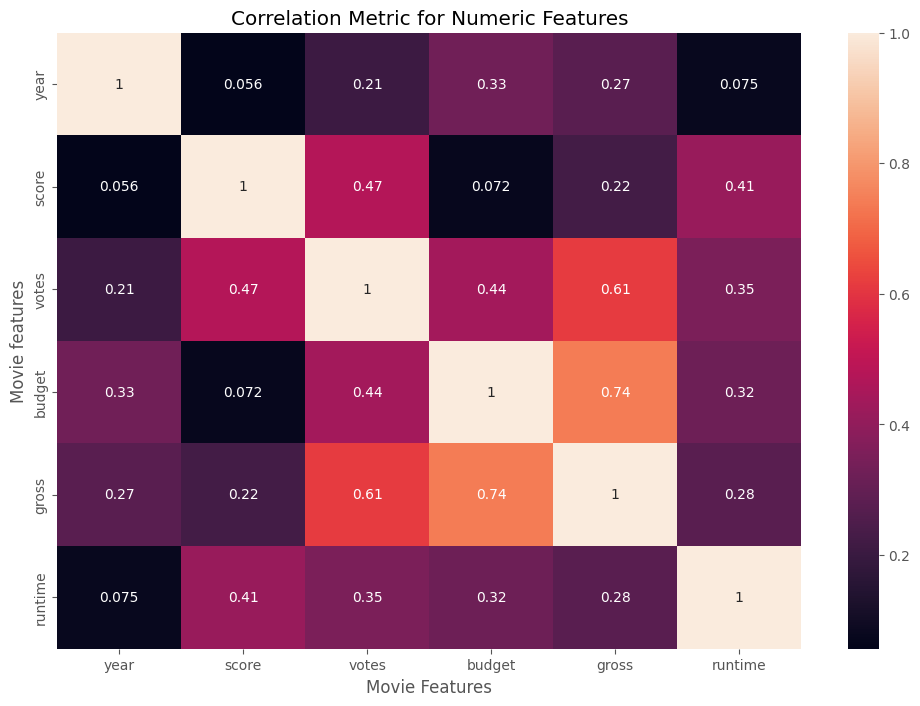

In [40]:
correlation_matrix = df.corr(method="pearson") #Pearson, Kendall, Spearman

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Metric for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie features")
plt.show()